In [203]:
import pandas as pd
import ipaddress
import numpy as np

# Data Cleaning

UNSW-NB15 = ub

In [204]:
ub_data = pd.concat(
    map(pd.read_csv, 
        ['C:/Users/kakol/Documents/DDOS/Datasets/NB15_Train.csv',
         'C:/Users/kakol/Documents/DDOS/Datasets/NB15_Test.csv']), 
    ignore_index=True)


In [205]:
ub_data = ub_data[['spkts','dpkts','sbytes','dbytes','dur','proto','attack_cat']]
#replacing the column names with proper name
ub_data.rename(columns = {'attack_cat':'category'}, inplace = True)

In [206]:
ub_data.head()

,spkts,dpkts,sbytes,dbytes,dur,proto,category
0,6,4,258,172,0.121478,tcp,Normal
1,14,38,734,42014,0.649902,tcp,Normal
2,8,16,364,13186,1.623129,tcp,Normal
3,12,12,628,770,1.681642,tcp,Normal
4,10,6,534,268,0.449454,tcp,Normal


In [207]:
ub_data['proto'].value_counts()

proto
tcp       123041
udp        92701
unas       15599
arp         3846
ospf        3271
           ...  
rdp          131
netblt       131
igmp          48
icmp          15
rtp            1
Name: count, Length: 133, dtype: int64

In [208]:
ub_data = ub_data[(ub_data['proto']=='udp') | (ub_data['proto']=='tcp')]

In [209]:
#replacing udp with 0 and tcp with 1
ub_data['proto'] = np.where(ub_data['proto'] == 'udp', 0, 1)

In [210]:
ub_data = ub_data[ub_data['category']=='Normal']

In [211]:
ub_data

,spkts,dpkts,sbytes,dbytes,dur,proto,category
0,6,4,258,172,0.121478,1,Normal
1,14,38,734,42014,0.649902,1,Normal
2,8,16,364,13186,1.623129,1,Normal
3,12,12,628,770,1.681642,1,Normal
4,10,6,534,268,0.449454,1,Normal
...,...,...,...,...,...,...,...
257666,2,0,104,0,0.000010,0,Normal
257667,2,0,104,0,0.000009,0,Normal
257668,2,0,104,0,0.000005,0,Normal
257669,20,8,18062,354,1.106101,1,Normal


In [212]:
ub_train = ub_data.iloc[:80000]

In [213]:
ub_train.to_csv('C:/Users/kakol/Documents/DDOS/Datasets/unsw_normal_train.csv',index=False)

In [214]:
ub_test = ub_data.iloc[80000:]
ub_test.to_csv('C:/Users/kakol/Documents/DDOS/Datasets/unsw_normal_test.csv',index=False)

In [215]:
ub_data.head()

,spkts,dpkts,sbytes,dbytes,dur,proto,category
0,6,4,258,172,0.121478,1,Normal
1,14,38,734,42014,0.649902,1,Normal
2,8,16,364,13186,1.623129,1,Normal
3,12,12,628,770,1.681642,1,Normal
4,10,6,534,268,0.449454,1,Normal


UNSW 2018 = sw

In [216]:
#merging all the csv's
sw_data = pd.concat(
    map(pd.read_csv, 
        ['C:/Users/kakol/Documents/DDOS/Datasets/UNSW_2018_IoT_Botnet_Full5pc_1.csv',
         'C:/Users/kakol/Documents/DDOS/Datasets/UNSW_2018_IoT_Botnet_Full5pc_2.csv',
         'C:/Users/kakol/Documents/DDOS/Datasets/UNSW_2018_IoT_Botnet_Full5pc_3.csv',
         'C:/Users/kakol/Documents/DDOS/Datasets/UNSW_2018_IoT_Botnet_Full5pc_4.csv']), 
    ignore_index=True)

C:\Users\kakol\AppData\Local\Temp\ipykernel_3980\2412195813.py:2: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  sw_data = pd.concat(
C:\Users\kakol\AppData\Local\Temp\ipykernel_3980\2412195813.py:2: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  sw_data = pd.concat(
C:\Users\kakol\AppData\Local\Temp\ipykernel_3980\2412195813.py:2: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  sw_data = pd.concat(
C:\Users\kakol\AppData\Local\Temp\ipykernel_3980\2412195813.py:2: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  sw_data = pd.concat(


In [217]:
sw_data = sw_data[['spkts','dpkts','sbytes','dbytes','dur','proto','category']]

In [218]:
sw_data.head()

,spkts,dpkts,sbytes,dbytes,dur,proto,category
0,5,3,650,1330,7.056393,tcp,DoS
1,1,1,60,60,0.000131,arp,DoS
2,5,3,796,1330,7.047852,tcp,DoS
3,5,3,694,1330,7.047592,tcp,DoS
4,5,3,989,1330,7.046841,tcp,DoS


In [219]:
sw_data['proto'].value_counts()

proto
udp          1996437
tcp          1662812
icmp            9052
arp              213
ipv6-icmp          8
Name: count, dtype: int64

In [220]:
#we only take tcp and udp as by removing other columns we are only rejecting 1% of the data
sw_data = sw_data[(sw_data['proto']=='udp') | (sw_data['proto']=='tcp')]

In [221]:
#replacing udp with 0 and tcp with 1
sw_data['proto'] = np.where(sw_data['proto'] == 'udp', 0, 1)

In [222]:
sw_data['category'].value_counts()

category
DDoS              1926573
DoS               1650197
Reconnaissance      81982
Normal                422
Theft                  75
Name: count, dtype: int64

In [223]:
sw_data = sw_data[(sw_data['category']=='DDoS') | (sw_data['category']=='DoS')]

In [224]:
sw_data

,spkts,dpkts,sbytes,dbytes,dur,proto,category
0,5,3,650,1330,7.056393,1,DoS
2,5,3,796,1330,7.047852,1,DoS
3,5,3,694,1330,7.047592,1,DoS
4,5,3,989,1330,7.046841,1,DoS
5,5,3,653,1330,7.046596,1,DoS
...,...,...,...,...,...,...,...
3576879,8,0,480,0,14.869558,0,DDoS
3576880,8,0,480,0,14.869558,0,DDoS
3576881,8,0,480,0,14.869558,0,DDoS
3576882,8,0,480,0,14.869558,0,DDoS


In [225]:
df_dos = sw_data[sw_data['category'] == 'DoS']
df_dos_train = df_dos.iloc[:1600000]
df_dos_test = df_dos.iloc[1641197:]

In [226]:
#saving csv ino train and test
df_dos_train.to_csv('C:/Users/kakol/Documents/DDOS/Datasets/bot_iot_dos_train.csv',index=False)
df_dos_test.to_csv('C:/Users/kakol/Documents/DDOS/Datasets/bot_iot_dos_test.csv',index=False)

In [227]:
df_ddos = sw_data[sw_data['category'] == 'DDoS']
df_ddos.reset_index(drop= True,inplace = True)

In [228]:
df_ddos

,spkts,dpkts,sbytes,dbytes,dur,proto,category
0,6,4,963,766,6.406424,1,DDoS
1,6,4,838,766,6.405851,1,DDoS
2,5,3,1008,700,6.401038,1,DDoS
3,5,3,762,700,6.400703,1,DDoS
4,5,3,596,700,6.400472,1,DDoS
...,...,...,...,...,...,...,...
1926568,8,0,480,0,14.869558,0,DDoS
1926569,8,0,480,0,14.869558,0,DDoS
1926570,8,0,480,0,14.869558,0,DDoS
1926571,8,0,480,0,14.869558,0,DDoS


In [229]:
df_ddos = sw_data[sw_data['category'] == 'DDoS']
df_ddos.reset_index(drop= True,inplace = True)
df_ddos_train = df_ddos.iloc[:1600000]
df_ddos_test = df_ddos.iloc[1917572:]

In [230]:
#saving csv ino train and test
df_ddos_train.to_csv('C:/Users/kakol/Documents/DDOS/Datasets/bot_iot_ddos_train.csv',index=False)
df_ddos_test.to_csv('C:/Users/kakol/Documents/DDOS/Datasets/bot_iot_ddos_test.csv',index=False)

In [231]:
df_ddos_train.head()

,spkts,dpkts,sbytes,dbytes,dur,proto,category
0,6,4,963,766,6.406424,1,DDoS
1,6,4,838,766,6.405851,1,DDoS
2,5,3,1008,700,6.401038,1,DDoS
3,5,3,762,700,6.400703,1,DDoS
4,5,3,596,700,6.400472,1,DDoS


In [232]:
df_ddos_train['category'].value_counts()

category
DDoS    1600000
Name: count, dtype: int64

(temp) TON IOT

In [233]:
tn_data = pd.read_csv('C:/Users/kakol/Documents/DDOS/Datasets/Ton_IOT.csv')

NSL

In [234]:
nsl_train = pd.read_csv('C:/Users/kakol/Documents/DDOS/Datasets/nsl_Train.txt')

In [235]:
nsl_test = pd.read_csv('C:/Users/kakol/Documents/DDOS/Datasets/nsl_Test.txt')

In [236]:
nsl_train.to_csv('nsl_Train.csv',  index = None) 

In [237]:
nsl_train.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
        'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
        'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
        'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
        'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
        'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
        'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
        'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
        'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
        'dst_host_srv_rerror_rate', 'label', 'difficulty_level']

In [238]:
nsl_test.to_csv('nsl_Test.csv',  index = None) 

In [239]:
nsl_test.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
        'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
        'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
        'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
        'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
        'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
        'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
        'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
        'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
        'dst_host_srv_rerror_rate', 'label', 'difficulty_level']

### Data Preprocessing

In [240]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn import metrics

In [241]:
#reading csv's
df_unsw_normal = pd.read_csv('C:/Users/kakol/Documents/DDOS/Datasets/unsw_normal_train.csv')
df_bot_dos = pd.read_csv('C:/Users/kakol/Documents/DDOS/Datasets/bot_iot_dos_train.csv')
df_bot_ddos = pd.read_csv('C:/Users/kakol/Documents/DDOS/Datasets/bot_iot_ddos_train.csv')

In [242]:
df_unsw_normal_test = pd.read_csv('C:/Users/kakol/Documents/DDOS/Datasets/unsw_normal_test.csv')
df_bot_dos_test = pd.read_csv('C:/Users/kakol/Documents/DDOS/Datasets/bot_iot_dos_test.csv')
df_bot_ddos_test = pd.read_csv('C:/Users/kakol/Documents/DDOS/Datasets/bot_iot_ddos_test.csv')

In [243]:
df_unsw_normal.head()

,spkts,dpkts,sbytes,dbytes,dur,proto,category
0,6,4,258,172,0.121478,1,Normal
1,14,38,734,42014,0.649902,1,Normal
2,8,16,364,13186,1.623129,1,Normal
3,12,12,628,770,1.681642,1,Normal
4,10,6,534,268,0.449454,1,Normal


In [244]:
df_bot_ddos.head()

,spkts,dpkts,sbytes,dbytes,dur,proto,category
0,6,4,963,766,6.406424,1,DDoS
1,6,4,838,766,6.405851,1,DDoS
2,5,3,1008,700,6.401038,1,DDoS
3,5,3,762,700,6.400703,1,DDoS
4,5,3,596,700,6.400472,1,DDoS


In [245]:
dataframe_list = list()

def data_chunks_creater(df_unsw_normal,df_bot_dos,df_bot_ddos):
    
    #we are taking 10 chunks only but you can take maximum upto 20
    number_of_chunks = 10
    data_limit = 80000*number_of_chunks
    
    #chunk_start and chunk_end are used to partition chunks from the oversampled data
    chunk_start = 0
    chunk_end = 80000
    
    #iterating so the chunks could be merged
    for _ in range(number_of_chunks):
        
        df_unsw_normal = df_unsw_normal
        
        df_bot_dos = pd.read_csv('C:/Users/kakol/Documents/DDOS/Datasets/bot_iot_dos_train.csv')
        df_bot_dos = df_bot_dos.iloc[:data_limit]
        df_bot_dos = df_bot_dos.iloc[chunk_start:chunk_end]
        
        df_bot_ddos = pd.read_csv('C:/Users/kakol/Documents/DDOS/Datasets/bot_iot_ddos_train.csv')
        df_bot_ddos = df_bot_ddos.iloc[:data_limit]
        df_bot_ddos = df_bot_ddos.iloc[chunk_start:chunk_end]
        
        #merging the data and also shuffling the data and appending the different chunks in a list, this also ensures the 
        #the data is still into chunks its well balanced and consistent
        df = pd.concat([df_unsw_normal, df_bot_dos, df_bot_ddos], ignore_index=True, sort=False)
        df = shuffle(df)
        df.reset_index(drop=True,inplace=True)
        dataframe_list.append(df)
        
        #updating chunk_start and chunk_end value
        chunk_start = chunk_end
        chunk_end = chunk_end+80000
        
    return dataframe_list

In [246]:
data[0]

,spkts,dpkts,sbytes,dbytes,dur,proto,category
0,6,4,258,172,0.121478,1,Normal
1,14,38,734,42014,0.649902,1,Normal
2,8,16,364,13186,1.623129,1,Normal
3,12,12,628,770,1.681642,1,Normal
4,10,6,534,268,0.449454,1,Normal
...,...,...,...,...,...,...,...
79995,10,8,970,354,0.675752,1,Normal
79996,20,8,17266,354,1.557666,1,Normal
79997,2,0,1064,0,0.000010,0,Normal
79998,10,8,968,354,1.589848,1,Normal


In [247]:
#A function which takes the big_data, but iterates through chunks, seperates x and y label and normalizes data using minmax
#the normalisation is done chunck wise and not for the full data
def data_preprocessing(data):
    x_label_data = list()
    y_label_data = list()
    for subset_data in data:
        df = subset_data
        x = df.loc[:, df.columns != 'category']
        #min_max
        x=(x-x.min())/(x.max()-x.min())
        y = df['category']
        x_label_data.append(x)
        y_label_data.append(y)
    return x_label_data,y_label_data

In [248]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Assuming you've already created your dataframe list and defined the data_preprocessing function
data = [df_unsw_normal, df_bot_dos, df_bot_ddos]
x_label_data, y_label_data = data_preprocessing(data)

# Combine all chunks into single arrays
X = np.concatenate(x_label_data)
y = np.concatenate(y_label_data)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Reshape input to be 3D [samples, time steps, features] for GRU
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [249]:
print("X_train shape:", X_train.shape)
print("X_train dtype:", X_train.dtype)
print("X_test shape:", X_test.shape)
print("X_test dtype:", X_test.dtype)

X_train shape: (2624000, 1, 6)
X_train dtype: float64
X_test shape: (656000, 1, 6)
X_test dtype: float64


In [250]:
# Assuming X_train shape is (2624000, 1, 6)
sequence_length = 10
new_X_train = np.zeros((X_train.shape[0] - sequence_length + 1, sequence_length, X_train.shape[2]))

for i in range(len(new_X_train)):
    new_X_train[i] = X_train[i:i+sequence_length, 0, :]

# new_X_train shape would be (2623991, 10, 6)

In [252]:
# Assuming X_test shape is (2624000, 1, 6)
sequence_length = 10
new_X_test = np.zeros((X_test.shape[0] - sequence_length + 1, sequence_length, X_test.shape[2]))

for i in range(len(new_X_test)):
    new_X_test[i] = X_test[i:i+sequence_length, 0, :]

# new_X_test shape would be (2623991, 10, 6)

In [310]:
new_X_train.shape

(2623991, 10, 6)

In [311]:
new_X_test.shape

(655991, 10, 6)

In [92]:
import numpy as np

def create_sliding_windows(data, window_size):
    num_samples, _, num_features = data.shape
    windowed_data = np.zeros((num_samples - window_size + 1, window_size, num_features))
    
    for i in range(len(windowed_data)):
        windowed_data[i] = data[i:i+window_size, 0, :]
    
    return windowed_data

#### Reduce X_train data using sliding window method

In [255]:
window_size = 10
X_train_windowed = create_sliding_windows(new_X_train, window_size)
X_test_windowed = create_sliding_windows(new_X_test, window_size)

# Print new shapes
print("X_train_windowed shape:", X_train_windowed.shape)
print("X_test_windowed shape:", X_test_windowed.shape)

X_train_windowed shape: (2623982, 10, 6)
X_test_windowed shape: (655982, 10, 6)


In [94]:
def adjust_labels(labels, window_size):
    return labels[window_size-1:]

y_train_windowed = adjust_labels(y_train, window_size)
y_test_windowed = adjust_labels(y_test, window_size)

In [264]:
print("y_train_windowed shape:", y_train_windowed.shape)
print("y_test_windowed shape:", y_test_windowed.shape)

y_train_windowed shape: (2623991, 3)
y_test_windowed shape: (655991, 3)


In [265]:
input_shape = (X_train_windowed.shape[1], X_train_windowed.shape[2])
print("New input shape:", input_shape)

New input shape: (10, 6)


In [96]:
num_classes

3

In [261]:
def create_gru_model(input_shape, num_classes):
    model = Sequential([
        GRU(64, input_shape=input_shape, return_sequences=True),
        GRU(32),
        Dense(16, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Get input shape and number of classes
input_shape = (X_train_windowed.shape[1], X_train_windowed.shape[2])
num_classes = y_categorical.shape[1]

# Create the model
model = create_gru_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', 'recall', 'f1_score'])

# Print model summary
model.summary()

c:\Users\kakol\miniconda3\envs\my_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_15 (GRU)                    │ (None, 10, 64)         │        13,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_16 (GRU)                    │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,811 (93.01 KB)

 Trainable params: 23,811 (93.01 KB)

 Non-trainable params: 0 (0.00 B)

### NTM Layer

In [262]:
import tensorflow as tf

class NTMLayer(tf.keras.layers.Layer):
    def __init__(self, memory_size, memory_vector_dim, controller_units):
        super(NTMLayer, self).__init__()
        self.memory_size = memory_size
        self.memory_vector_dim = memory_vector_dim
        self.controller_units = controller_units

        # GRU controller
        self.controller = tf.keras.layers.GRU(controller_units, return_sequences=True, return_state=True)

        # Read and write heads
        self.read_head = tf.keras.layers.Dense(memory_size, activation='softmax')
        self.write_head = tf.keras.layers.Dense(memory_size, activation='softmax')

        # Output layer
        self.output_layer = tf.keras.layers.Dense(memory_vector_dim)

    def build(self, input_shape):
        self.memory = self.add_weight(name='memory',
                                      shape=(self.memory_size, self.memory_vector_dim),
                                      initializer='glorot_uniform',
                                      trainable=True)

    def call(self, inputs):
        # Initial state for GRU
        initial_state = tf.zeros((tf.shape(inputs)[0], self.controller_units))

        # Process input sequence with GRU
        controller_output, _ = self.controller(inputs, initial_state=initial_state)

        # Read from memory
        read_weights = self.read_head(controller_output)
        read_vector = tf.matmul(read_weights, self.memory)

        # Write to memory (simplified)
        write_weights = self.write_head(controller_output)
        write_vector = self.output_layer(controller_output)
        memory_update = tf.matmul(tf.transpose(write_weights, perm=[0, 2, 1]), write_vector)
        self.memory.assign(self.memory + tf.reduce_sum(memory_update, axis=0))

        # Combine read vector with controller output
        output = tf.concat([controller_output, read_vector], axis=-1)
        return output

### GRU Model

##### Reduce size of the train data 
###### X_train data still big, reduction needed to decrease computation

In [263]:
import numpy as np

# Decide on the fraction of data to keep
fraction = 0.2  # This will keep 20% of your data. Adjust this value as needed.

# Get the number of samples to keep
num_samples = int(X_train_windowed.shape[0] * fraction)

# Randomly select indices
indices = np.random.choice(X_train_windowed.shape[0], num_samples, replace=False)

# Create the reduced dataset
X_train_reduced = X_train_windowed[indices]
y_train_reduced = y_train_windowed[indices]

# Print the shapes to confirm the reduction
print(f"Original X_train shape: {X_train_windowed.shape}")
print(f"Reduced X_train shape: {X_train_reduced.shape}")
print(f"Original y_train shape: {y_train_windowed.shape}")
print(f"Reduced y_train shape: {y_train_reduced.shape}")

Original X_train shape: (2623982, 10, 6)
Reduced X_train shape: (524796, 10, 6)
Original y_train shape: (2623991, 3)
Reduced y_train shape: (524796, 3)


In [267]:
model.fit(
    X_train_reduced, y_train_reduced,
    batch_size=16,
    epochs=20,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
    ]
)

Epoch 1/20
26240/26240 ━━━━━━━━━━━━━━━━━━━━ 1023s 39ms/step - accuracy: 0.9606 - f1_score: 0.8389 - loss: 0.0982 - recall: 0.9573 - val_accuracy: 0.9982 - val_f1_score: 0.9900 - val_loss: 0.0073 - val_recall: 0.9982
Epoch 2/20
26240/26240 ━━━━━━━━━━━━━━━━━━━━ 422s 16ms/step - accuracy: 0.9980 - f1_score: 0.9913 - loss: 0.0074 - recall: 0.9979 - val_accuracy: 0.9996 - val_f1_score: 0.9972 - val_loss: 0.0022 - val_recall: 0.9996
Epoch 3/20
26240/26240 ━━━━━━━━━━━━━━━━━━━━ 401s 15ms/step - accuracy: 0.9991 - f1_score: 0.9960 - loss: 0.0047 - recall: 0.9991 - val_accuracy: 0.9995 - val_f1_score: 0.9969 - val_loss: 0.0028 - val_recall: 0.9995
Epoch 4/20
26240/26240 ━━━━━━━━━━━━━━━━━━━━ 376s 14ms/step - accuracy: 0.9992 - f1_score: 0.9966 - loss: 0.0034 - recall: 0.9992 - val_accuracy: 0.9996 - val_f1_score: 0.9977 - val_loss: 0.0027 - val_recall: 0.9996
Epoch 5/20
26240/26240 ━━━━━━━━━━━━━━━━━━━━ 410s 16ms/step - accuracy: 0.9993 - f1_score: 0.9971 - loss: 0.0030 - recall: 0.9993 - val_accu

In [268]:
import matplotlib.pyplot as plt

In [269]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [270]:
epochs = range(1, len(train_loss) + 1)


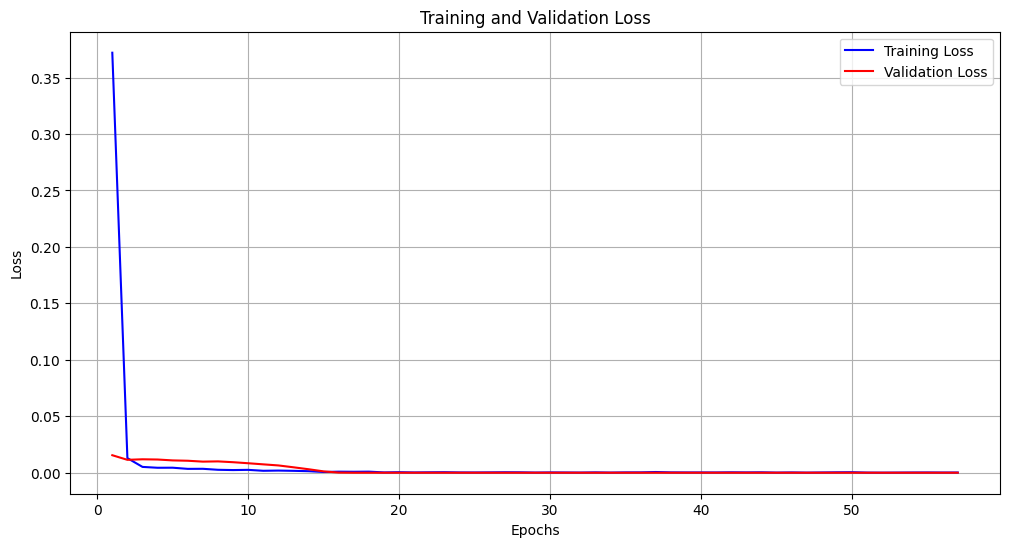

Epoch	Training Loss	Validation Loss
1	0.3720		0.0155
2	0.0129		0.0114
3	0.0052		0.0119
4	0.0044		0.0117
5	0.0044		0.0109
6	0.0034		0.0106
7	0.0035		0.0098
8	0.0026		0.0100
9	0.0024		0.0093
10	0.0025		0.0084
11	0.0017		0.0074
12	0.0019		0.0065
13	0.0017		0.0048
14	0.0014		0.0031
15	0.0006		0.0012
16	0.0009		0.0001
17	0.0008		0.0000
18	0.0009		0.0000
19	0.0003		0.0000
20	0.0005		0.0000
21	0.0003		0.0000
22	0.0004		0.0000
23	0.0005		0.0000
24	0.0003		0.0000
25	0.0002		0.0000
26	0.0003		0.0000
27	0.0004		0.0000
28	0.0004		0.0000
29	0.0002		0.0000
30	0.0003		0.0000
31	0.0002		0.0000
32	0.0001		0.0000
33	0.0003		0.0000
34	0.0001		0.0000
35	0.0003		0.0000
36	0.0003		0.0000
37	0.0006		0.0000
38	0.0003		0.0000
39	0.0003		0.0000
40	0.0003		0.0000
41	0.0002		0.0000
42	0.0004		0.0000
43	0.0003		0.0000
44	0.0004		0.0000
45	0.0001		0.0000
46	0.0003		0.0000
47	0.0001		0.0000
48	0.0002		0.0000
49	0.0004		0.0000
50	0.0005		0.0000
51	0.0001		0.0000
52	0.0001		0.0000
53	0.0001		0.0000
54	0.0002		0.0000
5

In [271]:
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Print loss for each epoch
print("Epoch\tTraining Loss\tValidation Loss")
for i, (train, val) in enumerate(zip(train_loss, val_loss), 1):
    print(f"{i}\t{train:.4f}\t\t{val:.4f}")

#### Accuracy

In [284]:
result = model.evaluate(X_train_reduced, y_train_reduced)
test_accuracy = result[0]
test_f1_score = result[1]
test_loss = result[2]
test_recall = result[3]
print(f"Test accuracy: {test_accuracy}")
print(f"Test f1 score: {test_f1_score}")
print(f"Test loss: {test_loss}")
print(f"Test recall: {test_recall}")

16400/16400 ━━━━━━━━━━━━━━━━━━━━ 240s 15ms/step - accuracy: 0.9996 - f1_score: 0.9975 - loss: 0.0021 - recall: 0.9996
Test accuracy: 0.0020092481281608343
Test f1 score: 0.9996074438095093
Test loss: 0.9996036291122437
Test recall: [0.9996096 0.9999354 0.9930858]


In [317]:
result[5]

IndexError: list index out of range

In [283]:
y_pred = model.predict(X_train_reduced)
y_pred_classes = np.argmax(y_pred, axis=1)

16400/16400 ━━━━━━━━━━━━━━━━━━━━ 143s 9ms/step


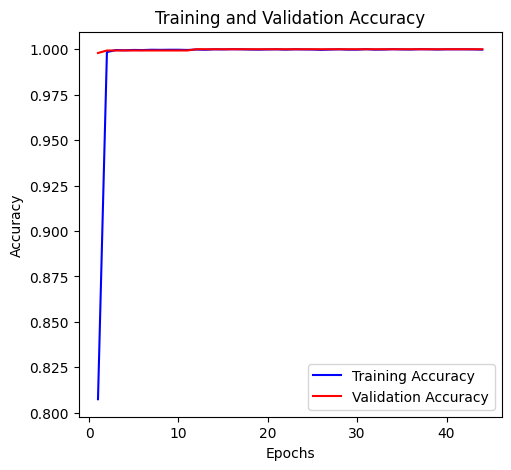

In [293]:
epochs = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

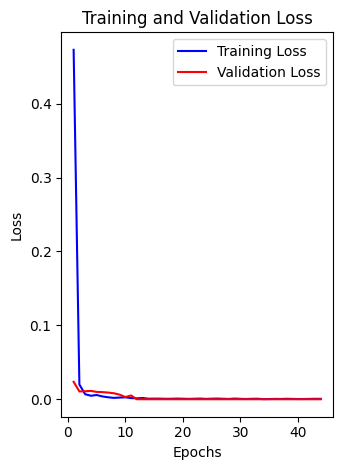

In [294]:
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [307]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your true labels and predicted probabilities
y_test_binary = tf.keras.utils.to_categorical(y_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(10, 8))

for i, class_name in enumerate(classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'{class_name} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

ValueError: invalid literal for int() with base 10: 'DDoS'

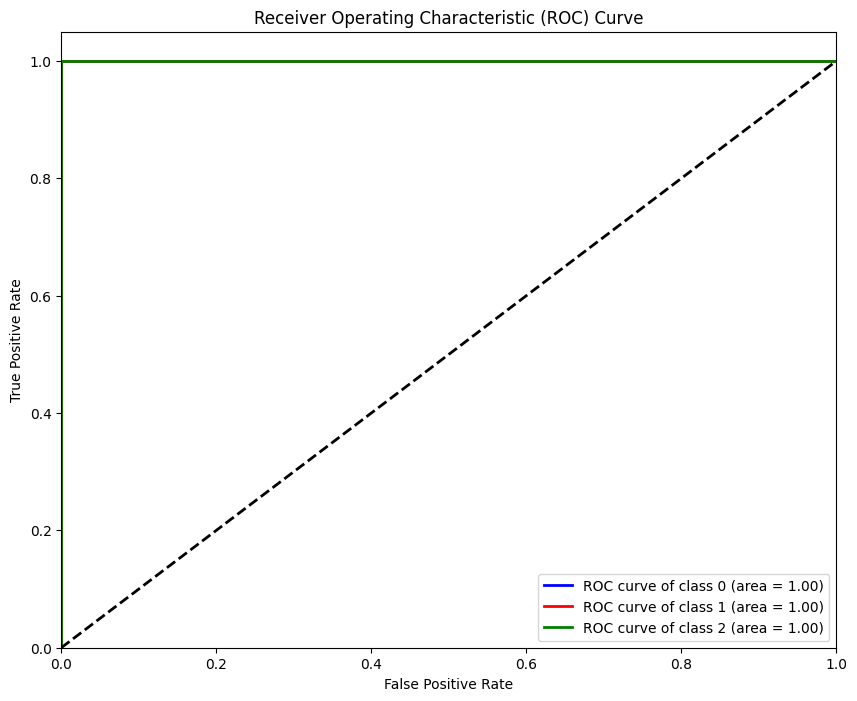

In [297]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import matplotlib.pyplot as plt

n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test_encoded == i).astype(int), y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [300]:
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_classes))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1796
           1       1.00      1.00      1.00      1790
           2       1.00      1.00      1.00      1812

    accuracy                           1.00      5398
   macro avg       1.00      1.00      1.00      5398
weighted avg       1.00      1.00      1.00      5398


Confusion Matrix:
[[1796    0    0]
 [   0 1790    0]
 [   0    0 1812]]


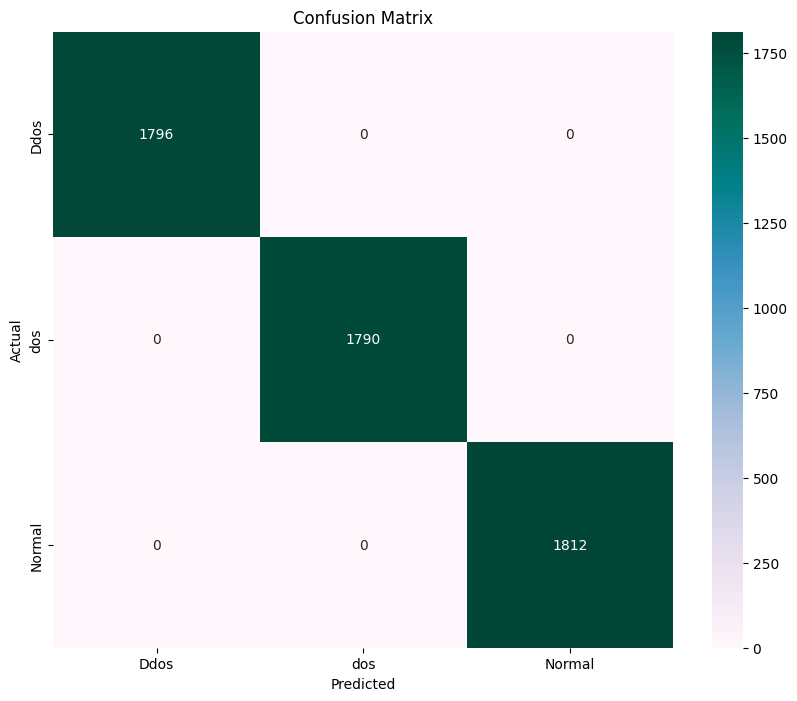

In [301]:
classes = ['Ddos', 'dos', 'Normal']

# Create confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBuGn', 
            xticklabels=classes, yticklabels=classes)

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
# Plot ROC curve
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import matplotlib.pyplot as plt

n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_train_reduced == i).astype(int), y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Plot ROC curve
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import matplotlib.pyplot as plt

n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test_encoded == i).astype(int), y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [280]:
from sklearn.metrics import accuracy_score

# Calculate overall accuracy
accuracy = accuracy_score(X_train_reduced, y_train_reduced)

# Print the accuracy
print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Overall Accuracy(%): {accuracy*100:.2f}%")

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Add overall accuracy to the plot
plt.text(len(classes)/2, -0.1, f'Overall Accuracy: {accuracy:.4f}', 
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)

plt.tight_layout()
plt.show()

ValueError: Classification metrics can't handle a mix of unknown and multilabel-indicator targets

# Testing 

In [121]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn import metrics

In [122]:
df_unsw_normal_test = pd.read_csv('C:/Users/kakol/Documents/DDOS/Datasets/unsw_normal_test.csv')
df_bot_dos_test = pd.read_csv('C:/Users/kakol/Documents/DDOS/Datasets/bot_iot_dos_test.csv')
df_bot_ddos_test = pd.read_csv('C:/Users/kakol/Documents/DDOS/Datasets/bot_iot_ddos_test.csv')

In [123]:
df_unsw_normal_test.head()

,spkts,dpkts,sbytes,dbytes,dur,proto,category
0,2,0,1064,0,0.000002,0,Normal
1,10,6,586,268,1.140726,1,Normal
2,20,8,17266,354,1.238755,1,Normal
3,2,0,1064,0,0.000009,0,Normal
4,10,8,964,354,2.107375,1,Normal


In [124]:
df_bot_dos_test.head()

,spkts,dpkts,sbytes,dbytes,dur,proto,category
0,7,0,420,0,21.483566,0,DoS
1,7,0,420,0,21.483566,0,DoS
2,7,0,420,0,21.483568,0,DoS
3,7,0,420,0,21.483566,0,DoS
4,7,0,420,0,21.483568,0,DoS


In [125]:
df_bot_ddos_test.head()

,spkts,dpkts,sbytes,dbytes,dur,proto,category
0,14,0,840,0,12.927310,0,DDoS
1,14,0,840,0,12.927311,0,DDoS
2,14,0,840,0,12.927310,0,DDoS
3,14,0,840,0,12.927311,0,DDoS
4,14,0,840,0,12.927310,0,DDoS


In [135]:
df_test = pd.concat([df_unsw_normal_test, df_bot_dos_test, df_bot_ddos_test], ignore_index=True)



In [136]:
features = ['spkts','dpkts','sbytes','dbytes','dur','proto']

In [137]:
X_test = df_test[features]

In [138]:
if X_test['proto'].dtype == 'object':
    X_test['proto'] = pd.Categorical(X_test['proto']).codes

In [139]:
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

In [140]:
window_size = 10
X_test_windowed = np.array([X_test_scaled[i:i+window_size] for i in range(len(X_test_scaled) - window_size + 1)])


In [141]:
y_test = df_test['category'].iloc[window_size-1:]
# Convert labels to numerical if they're not already
if y_test.dtype == 'object':
    y_test = pd.Categorical(y_test).codes
# Convert to one-hot encoding
y_test_onehot = to_categorical(y_test)


In [142]:
y_pred_proba = model.predict(X_test_windowed)
y_pred = np.argmax(y_pred_proba, axis=1)

844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step


In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\kakol\miniconda3\envs\my_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.6926 - loss: 0.7533 - val_accuracy: 0.9979 - val_loss: 0.0236
Epoch 2/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9982 - loss: 0.0267 - val_accuracy: 0.9993 - val_loss: 0.0106
Epoch 3/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9994 - loss: 0.0086 - val_accuracy: 0.9993 - val_loss: 0.0108
Epoch 4/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9995 - loss: 0.0045 - val_accuracy: 0.9993 - val_loss: 0.0113
Epoch 5/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9997 - loss: 0.0055 - val_accuracy: 0.9993 - val_loss: 0.0099
Epoch 6/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9997 - loss: 0.0036 - val_accuracy: 0.9993 - val_loss: 0.0097
Epoch 7/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9997 - loss: 0.0030 - val_accuracy: 0.9993 - val_loss: 0.0090
Epoch 8/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9998 - loss: 0.0018 -

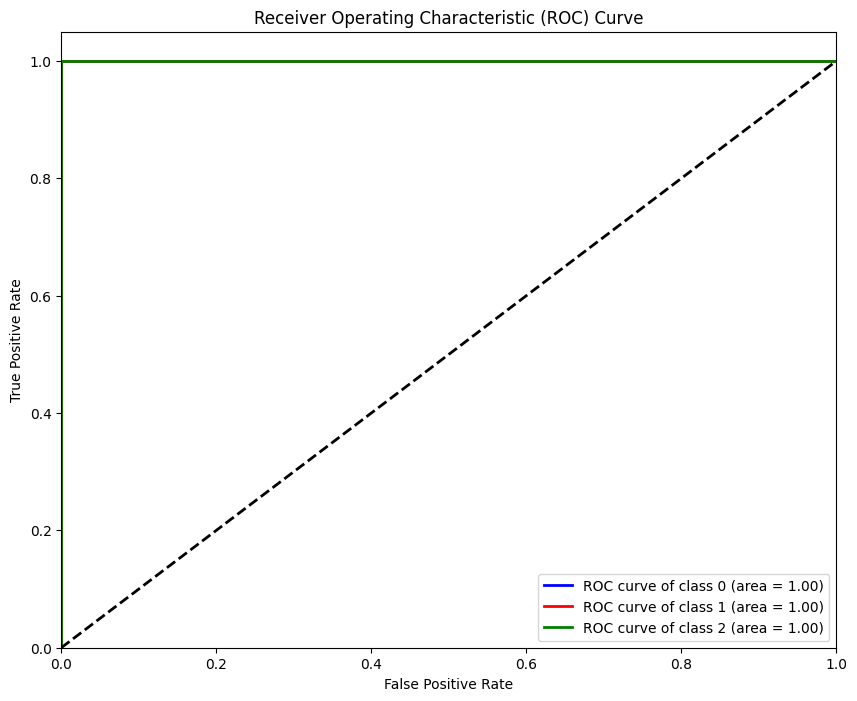

In [291]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load the datasets
df_unsw_normal = pd.read_csv('C:/Users/kakol/Documents/DDOS/Datasets/unsw_normal_test.csv')
df_bot_dos = pd.read_csv('C:/Users/kakol/Documents/DDOS/Datasets/bot_iot_dos_test.csv')
df_bot_ddos = pd.read_csv('C:/Users/kakol/Documents/DDOS/Datasets/bot_iot_ddos_test.csv')

# Combine all datasets
df = pd.concat([df_unsw_normal, df_bot_dos, df_bot_ddos], ignore_index=True)

# Feature engineering
df['spkts_dpkts_ratio'] = df['spkts'] / (df['dpkts'] + 1e-8)  # Adding small value to avoid division by zero
df['sbytes_dbytes_ratio'] = df['sbytes'] / (df['dbytes'] + 1e-8)
df['bytes_per_packet_src'] = df['sbytes'] / (df['spkts'] + 1e-8)
df['bytes_per_packet_dst'] = df['dbytes'] / (df['dpkts'] + 1e-8)

# Select features
features = ['spkts', 'dpkts', 'sbytes', 'dbytes', 'dur', 'proto', 
            'spkts_dpkts_ratio', 'sbytes_dbytes_ratio', 'bytes_per_packet_src', 'bytes_per_packet_dst']

X = df[features]
y = df['category']

# Convert 'proto' to numerical if it's categorical
if X['proto'].dtype == 'object':
    X['proto'] = pd.Categorical(X['proto']).codes

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Reshape input for LSTM (samples, time steps, features)
X_train_reshaped = X_train_resampled.reshape((X_train_resampled.shape[0], 1, X_train_resampled.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Convert labels to numerical
y_train_encoded = pd.Categorical(y_train_resampled).codes
y_test_encoded = pd.Categorical(y_test).codes

# Build the model
model = Sequential([
    LSTM(64, input_shape=(1, X_train_reshaped.shape[2]), return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_reshaped, y_train_encoded,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")

# Make predictions
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_classes))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred_classes))

# Plot ROC curve
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import matplotlib.pyplot as plt

n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test_encoded == i).astype(int), y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [179]:
from sklearn.metrics import recall_score


In [180]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [160]:
cm = metrics.confusion_matrix(y_test_encoded, y_pred_classes)

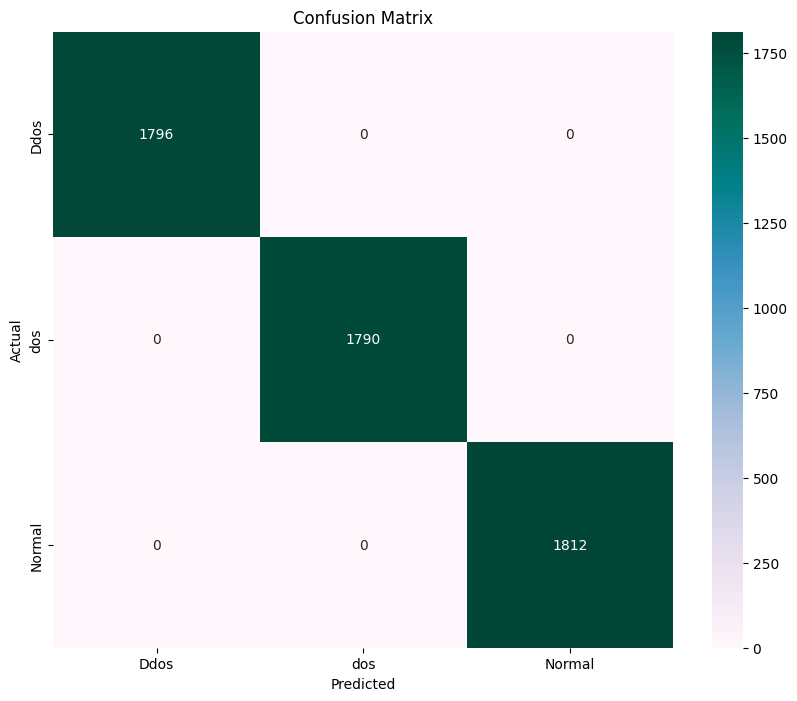

In [165]:
classes = ['Ddos', 'dos', 'Normal']

# Create confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBuGn', 
            xticklabels=classes, yticklabels=classes)

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
import torch
from torchvision import models
from ptflops import get_model_complexity_info

def measure_model_complexity(model, input_size=(3, 224, 224)):
    # Count number of parameters
    total_params = sum(p.numel() for p in model.parameters())
    
    # Estimate FLOPs
    macs, params = get_model_complexity_info(model, input_size, as_strings=False, print_per_layer_stat=False)
    
    return {
        "Total Parameters": total_params,
        "Computational Complexity (GFLOPs)": macs / 1e9
    }

# Example usage
model = models.resnet18()
complexity = measure_model_complexity(model)
print(complexity)